In [1]:
#Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Uploading Data
data = pd.read_csv("50_Startups.csv")

In [5]:
#Show first 5 lines
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
#كم صف وكم عمود
data.shape

(50, 5)

In [10]:
#بتعرضلي اصغر قميه و اكبر قيمه و المتوسط و النسب
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
#هتعرضلي العواميد اللي فيها حاجه قيم فاضيه
data.isnull().sum()


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [15]:
#هيعرضلي القيم اللي متكرره
data.duplicated().sum()

0

In [16]:
#هيعرضلي بعض المعلومات عن داتا زي ونوعها و هل في حاجات فاضيه ولا لا و استخدام الميموري
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [17]:
#بنسخدمها لهم البيانات او التحليل الاستكشافي و هتورينا فهم العلاقات و دع بنسيمه
#Correlation
#مدي ارتباط الاعمده مع بعض
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


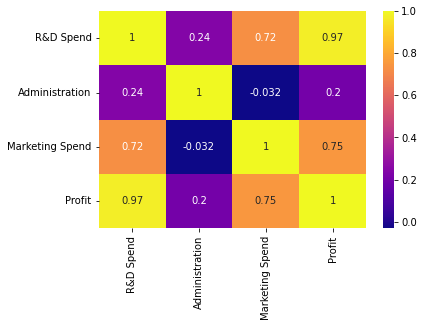

In [18]:
#هيعرضلي الكورليشن برضو بس عن طريق الاللوان عشان افهم اكتر الدنيا
sns.heatmap(data.corr(),annot=True,cmap='plasma')
plt.show()

معني الكلام دا ان العلاقات القويه في الرسمه اللي فوق هي العلاقات اللي اللي لونها اصفر و دا طبعا حسب المسطره اللي في الجمب

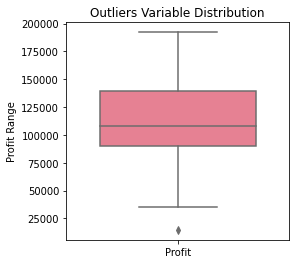

In [24]:
#دا اوت لايرز معناها قيم متطرفه او شاذه 
outliers=['Profit']
plt.rcParams['figure.figsize']=[4,4]
sns.boxplot(data=data[outliers], orient="v", palette="husl" , width=0.7)

plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")

plt.show()

In [25]:
#القيم الشاذه دي ماثرتش تاثير كبير علي الداتا

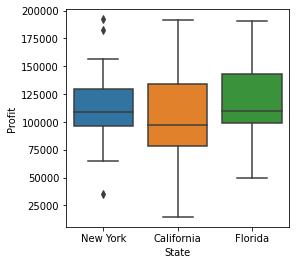

In [26]:
#دا هيورينا بقا الاوت لايرز او الحاجات الشاذه فين بالظبط عن طريق اسماء الولاياات
sns.boxplot(x = 'State' ,y ='Profit' , data= data )
plt.show()

الشركات الموجوده في كالفيريونيا كدا ليها اكثر ربح و اكثر خساره 

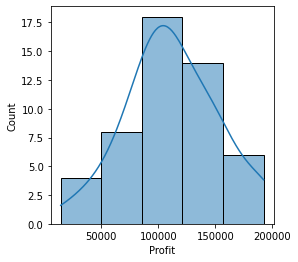

In [31]:
#هيعرضلي هيستوجرام
sns.histplot(data['Profit'],bins=5,kde=True)   #KDE هو الخط اللي بيظهر علي البارات
plt.show()

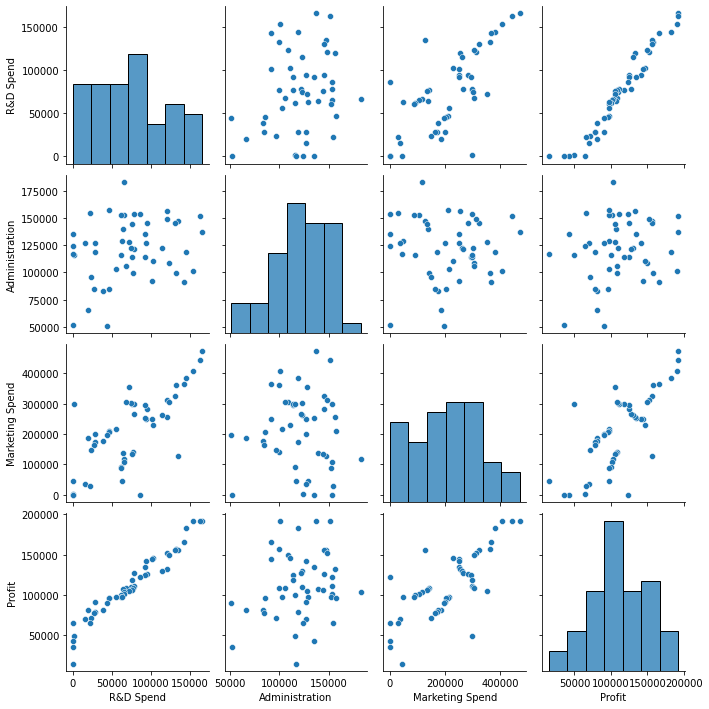

In [33]:
#اشكال توزيع البايانات علي شكل سكاتر بلوت
sns.pairplot(data)
plt.show()

# بص يا معلم الحاجات دي بتوريني العلاقات بين الاعمده وبعض
يعني مثلا عند في الربح و نسبه البحث و التطوير هتلاقي علاقه طريده بين الاتنين  نفس الكلام مع الماركتينج معني الكلام دا انك مهم جدا انك تعمل ماركيتينج و تدقع فلوس في البحث و التطوير لشركتك عشان تبقي شركه ناجحه و يجيلك ارباح اكتر

طيب دلوقت هنجهز البيانات بقا عشان نعمل 
Linear Regression

In [35]:
#تجهيز الداتا 
x=data[["R&D Spend" , "Administration" , "Marketing Spend"]] #القيم اللي هتساعدنا علي التوقع
y=data["Profit"] ##ده اللي هنتوقعو

x=x.to_numpy() #عايزين نحول البيانات الي نمباي ارراي 
y=y.to_numpy() #هنحولها برضو لمصفوفه نمباي
#مش فاهم اوي السطر اللي جاي انا اسف
y=y.reshape(-1,1)  ## هقول لبايثون اختاري القيمه المناسبه بس بشرط يكون الواحد مود واحد في الواي

In [38]:
#هنا بقا هقسم الداتا
#تلاتين في الميه هنعمنل عليه تست او اختبار هنشوف الموديل نجح ولا لا
#و سبعين في الميه من الداتا دي عشان اعلم الموديل بتاعي ازاي يعمل تست اصلا و يتنبأ بالارباح اللي احا اساس بنعمل المشروع عشانها 
#راندوم ستيت : الموديل هيطلعلي بيانات مختلفه لو انا محطتش رقم ليها عشان بيطلع ارقام عشوائيه
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain ,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(xtrain,ytrain) ##  هنعمل تعبأه للبيانات اللي عملنالها ترين وتيست في الموديل عشان نجرب بقا
ypred=model.predict(xtest) ##بعمل بريديت هنا عن طريق الاكس تست او عملنا لها اختبار
data=pd.DataFrame(data={"Predicted Profit": ypred.flatten()}) ##هيعملي عمود جديد اسمو بريديكتيت بروفيت وهيستخدم الواي بريديكت وبعدها اعمل فلات للقيم
#Flatten is used to convert from array a numeric value
#يعني بتستعمل اني احول من اراي لقيمه عاديه عشان اعرف اشوفها واتعامل معاها
print(data.head())

   Predicted Profit
0     125972.148263
1      85471.922710
2      98924.151683
3      46639.786287
4     128142.124732


In [46]:

#هنعمل بقا اختبار للموديل عشان نشوف الدقه بتاعتو عامله ازاي حلوه ولا وحشه

testing_data_model_score = model.score(xtest , ytest)
print("Model Score /Performance on Testing Data " ,testing_data_model_score)

training_data_model_score = model.score(xtrain , ytrain)
print("Model Score /Performance on Training Data " ,training_data_model_score)



Model Score /Performance on Testing Data  0.9418819530700165
Model Score /Performance on Training Data  0.9508557563847194


In [49]:
#هيعملي مقاره بين القيم الحقيقيه و القيم اللي توقعناها كام بقا

df= pd.DataFrame(data={'Predicted value':ypred.flatten(), 'Actual Value': ytest.flatten()})
df

,Predicted value,Actual Value
0,125972.148263,134307.35
1,85471.922710,81005.76
2,98924.151683,99937.59
3,46639.786287,64926.08
4,128142.124732,125370.37
5,52602.190537,35673.41
6,108364.697602,105733.54
7,100331.588469,107404.34
8,97538.566747,97427.84
9,112496.703984,122776.86


هتلاحظ اني في فروقات حصل اساسا بين القيمه البحقيقيه و القيمه المتوقعه 

# عايزين نعمل تقييم لموديل بقا

In [51]:
#هستخدم حاجه اسمها r square

In [52]:
#evaluate the model
from sklearn.metrics import r2_score

r2Score = r2_score (ypred,ytest)
print("T2 score of model is :" , r2Score*100)

T2 score of model is : 93.55141378867275


In [53]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(ypred, ytest)
print("Mean Squarred error is :" , mse*100)

Mean Squarred error is : 8177214943.547152


In [55]:
rmse=np.sqrt(mean_squared_error(ypred,ytest))
print("Root Mean Squarred Error is :", rmse*100)

Root Mean Squarred Error is : 904279.5443637522


In [57]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(ypred,ytest)
print("Mean Absolute Error is : ",mae)

Mean Absolute Error is :  7222.59434696552
